In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# loading data
data = pd.read_csv('ex2data1.txt')
"""
df = pd.DataFrame(data)
df.columns = ["X_1","X_2","y"]
df.head(10)
df.iloc[df["y"]== 0]

"""

'\ndf = pd.DataFrame(data)\ndf.columns = ["X_1","X_2","y"]\ndf.head(10)\ndf.iloc[df["y"]== 0]\n\n'

In [4]:
# exploring the dataset
x_0 = data["x_0"]
x_1 = data["x_1"]
print(data.head())

         x_0        x_1  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


In [5]:
# max value for poth features used for feature scaling 
x_0_max = max(x_0)
x_1_max = max(x_1)
print(x_0_max,x_1_max)

99.82785779692128 98.86943574220612


In [6]:
x_train = np.array([[x_0[i]/x_0_max,x_1[i]/x_1_max] for i in range(100)])
y_train = np.array(data["y"])
x_train =  x_train
y_train = y_train
w_init = [-50,0]
b_init = -50
print(x_train[0:5])

print(y_train)

[[0.34683364 0.78916899]
 [0.30338937 0.44396933]
 [0.35909224 0.73735829]
 [0.60286378 0.87295484]
 [0.79169019 0.76205933]]
[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]


# ploting data examples 

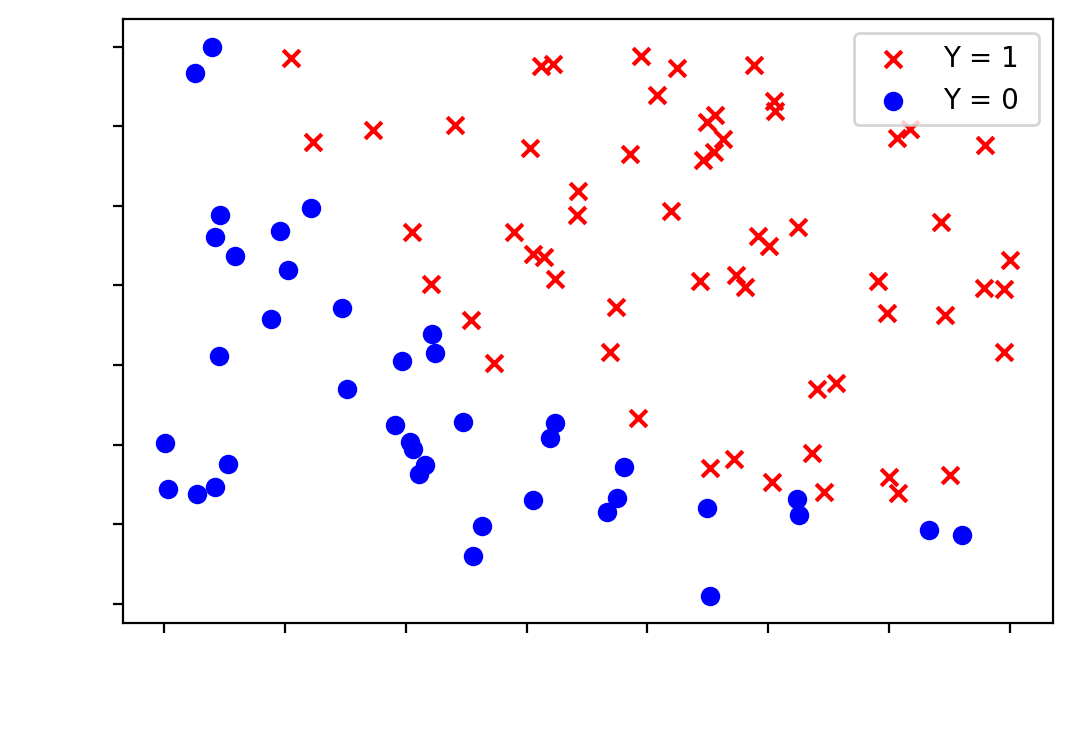

In [7]:
x1_train = x_train[:,0]
x2_train = x_train[:,1]
pos = (y_train == 1)
neg = (y_train == 0)

plt.figure(dpi = 200)
plt.scatter(x1_train[pos],x2_train[pos], label =  "Y = 1 " ,marker = "x", c ="r" )
plt.scatter(x1_train[neg],x2_train[neg], label = "Y = 0" ,marker = "o", c = "b")

plt.xlabel("X0", c = "w" )
plt.ylabel("X1", c = "w" )
plt.xticks(c = "w" )
plt.yticks( c = "w" )
plt.legend()
plt.show()

In [8]:
def logistic_model (z):
    z = np.array(z)
    g_z = 1/(1+(np.exp(-z)))
    return g_z

In [9]:
def liner_modle (x,w,b):
    m = x.shape[0]
    f_wb = []
    for i in range(m):
        f_wb.append(np.dot(w,x[i]) + b) 
    return f_wb

In [10]:
def Cost_logistic_regularized (x,y,w,b,lamda):
    f_wb = logistic_model(liner_modle(x,w,b))
    loss = []
    reg = []
    m,n = x.shape
    for i in range(m):
        loss.append( y[i]*np.log(f_wb[i]) + (1-y[i])*np.log(1-f_wb[i]))
    for j in range(n):
        reg.append(w[j]**2)
    total_cost = sum(loss) / -m + (lamda/(2*m))*sum(reg)
    return  total_cost

# Computing the Gradient with regularization for logistic regression

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align*}$$
As you can see gradient calculation for both linear and logistic regression are nearly identical, differing only in computation of $f_{\mathbf{w}b}$.

In [11]:
def gradent_regularized (x,y,w,b,lamda):
    m,n =x.shape
    f_wb = logistic_model(liner_modle(x,w,b))
    dj_dw = []
    dj_db = []
    for j in range(n):
        cost = []
        for i in range(m):
            cost.append((f_wb[i]-y[i])*x[i][j])
        dj_dw.append(sum(cost)/m + (lamda/m)*w[j])
    
    for i in range(m):
        dj_db.append((f_wb[i]-y[i]))
    
    return dj_dw,sum(dj_db)/m 
            

In [12]:
def gradent_descent(x,y,w,b,alpha,num_iter,lamda):
    iter_num_i = []
    cost_for_iter_num_i = []
    for i in range(num_iter):
        dj_dw ,dj_db = gradent_regularized(x,y,w,b,lamda)
        w = w - alpha * np.array(dj_dw)
        b = b - alpha * dj_db
        if i%50 == 0:
            iter_num_i.append(i)
            cost_for_iter_num_i.append(Cost_logistic_regularized(x,y,w,b,lamda))
        if i%1000 == 0:
            print ("iter {}: w = {} & b = {} ========>  Cost:  {}".format(i,w,b,Cost_logistic_regularized(x,y,w,b,lamda)))
    print("the optimal value for w = {} & b = {}".format(w,b))
    return w,b,iter_num_i,cost_for_iter_num_i

In [13]:
w,b,iter_num_i,cost_for_iter_num_i = gradent_descent(x_train,y_train,w_init,b_init,0.2,10000,0.2)

iter 0: w = [-49.89018268   0.08976251] & b = -49.88 ========>  Cost:  54.781764548325505
iter 1000: w = [-2.88341228 18.92193912] & b = -9.482648110716259 ========>  Cost:  1.2510108750128512
iter 2000: w = [ 5.29979108 10.05987382] & b = -9.461464199519432 ========>  Cost:  0.45807549330964364
iter 3000: w = [6.97118548 7.39770443] & b = -8.867637336867274 ========>  Cost:  0.3966241986624106
iter 4000: w = [7.04198709 6.68379588] & b = -8.453844307195673 ========>  Cost:  0.3927898699667782
iter 5000: w = [6.91497664 6.42000215] & b = -8.202149377064886 ========>  Cost:  0.3920183051761667
iter 6000: w = [6.8102811  6.29137705] & b = -8.051970082256362 ========>  Cost:  0.3917621195058933
iter 7000: w = [6.74349272 6.2201526 ] & b = -7.9631420392888845 ========>  Cost:  0.3916729966889982
iter 8000: w = [6.70338722 6.17905678] & b = -7.910874579296466 ========>  Cost:  0.3916421501453131
iter 9000: w = [6.67973075 6.1550864 ] & b = -7.880215522401674 ========>  Cost:  0.391631536195

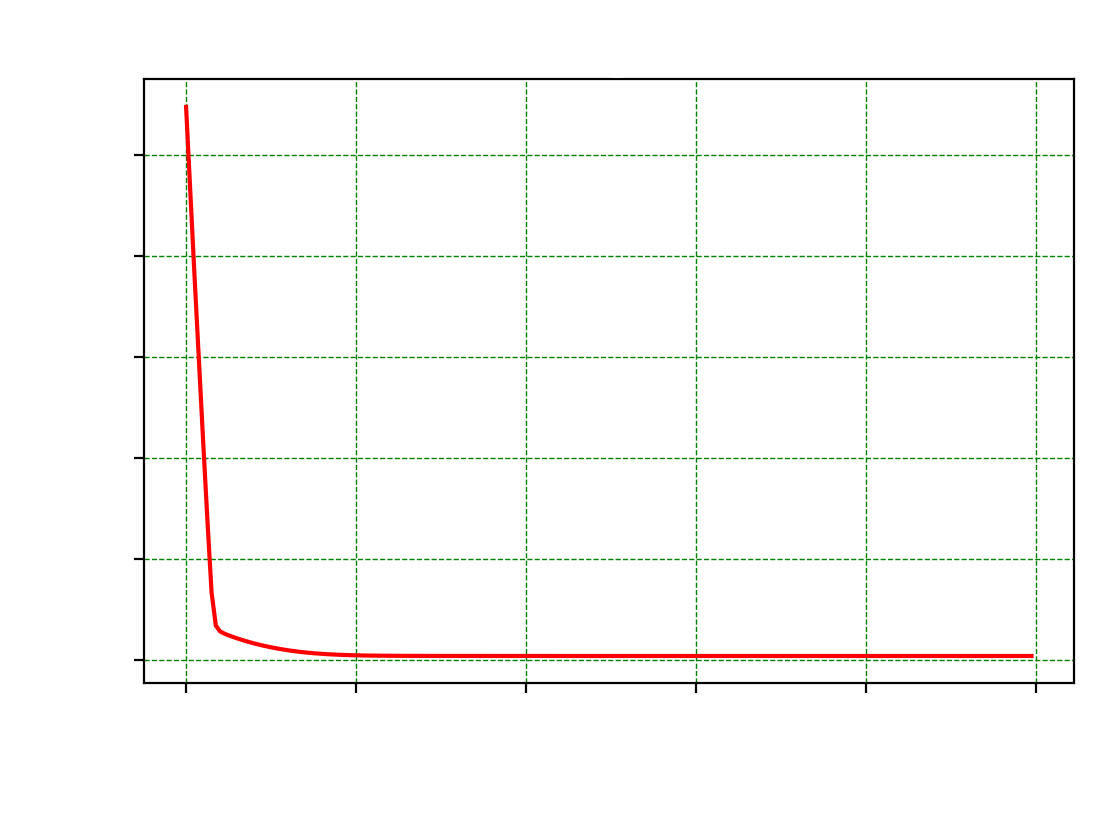

In [14]:
plt.figure(dpi = 200)
plt.plot(iter_num_i,cost_for_iter_num_i,c = 'r')

plt.title("Learning Curve",fontdict={"fontname":'comic sans ms',"fontsize":20},color= "w")
plt.xlabel('num_iterations',fontdict={"fontname":'comic sans ms',"fontsize":20},color= "w")
plt.ylabel('Cost',fontdict={"fontname":'comic sans ms',"fontsize":20},c = 'w')
plt.xticks(c = "w")
plt.yticks(c = "w")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

In [15]:
predction =  100*logistic_model(liner_modle(x_train,w,b))
predction

array([33.09311452,  4.25549995, 28.08122059, 82.01291697, 89.04061519,
       20.52301591, 90.13804547, 50.97513369, 93.39539874, 61.76538116,
       71.3621138 , 27.83863012, 91.56140167, 94.47502427, 37.77101084,
       78.28764759, 50.64145714, 39.51131177, 93.26444416, 55.79792643,
       33.11971781, 90.13902181, 18.9493965 ,  5.56284716, 83.54949007,
       65.49502744, 56.86441556, 68.25114745, 35.15828838, 22.52504117,
       68.104153  , 79.96593822, 38.65618166, 48.14264436, 31.97183398,
       27.46955396, 63.26188175, 80.97677303, 42.8965117 , 28.77235893,
       77.51557762, 18.09594129, 92.53068414, 54.00908143, 16.69436479,
       38.37231026, 84.13833989, 98.29300691, 90.83102786, 97.72693547,
       88.91835038, 92.79319427, 70.66106913, 14.11770438, 19.6083848 ,
       30.23194196, 94.95535991, 56.24078564, 80.73055249, 85.8735288 ,
       92.40699262,  7.00769966, 15.87771285,  5.87029369, 32.03429018,
       29.62106458, 71.04211387, 20.37696149, 96.15760729, 59.45

In [16]:
l = len(predction)
for i in range(l):
    if predction[i] > 50:
        print("example:{} is {} % maligmant ===> maligmant".format(i+1,predction[i]))
    else:
        print("example:{} is {} % maligmant ===> not_maligmant".format(i+1,predction[i]))

example:1 is 33.09311452059992 % maligmant ===> not_maligmant
example:2 is 4.255499949141596 % maligmant ===> not_maligmant
example:3 is 28.081220589317052 % maligmant ===> not_maligmant
example:4 is 82.01291696687139 % maligmant ===> maligmant
example:5 is 89.04061519424607 % maligmant ===> maligmant
example:6 is 20.523015909205157 % maligmant ===> not_maligmant
example:7 is 90.13804547168661 % maligmant ===> maligmant
example:8 is 50.97513368665514 % maligmant ===> maligmant
example:9 is 93.39539873744998 % maligmant ===> maligmant
example:10 is 61.76538116092757 % maligmant ===> maligmant
example:11 is 71.36211380497463 % maligmant ===> maligmant
example:12 is 27.838630118509982 % maligmant ===> not_maligmant
example:13 is 91.5614016739638 % maligmant ===> maligmant
example:14 is 94.475024269892 % maligmant ===> maligmant
example:15 is 37.771010840615055 % maligmant ===> not_maligmant
example:16 is 78.28764758780113 % maligmant ===> maligmant
example:17 is 50.641457142948894 % malig

In [17]:
# we can draw the boundary line where z = 0 as follows 
x0 = np.arange(0.25,1.0,0.1)
x1 =  -(b + w[0]*x0)/w[1]

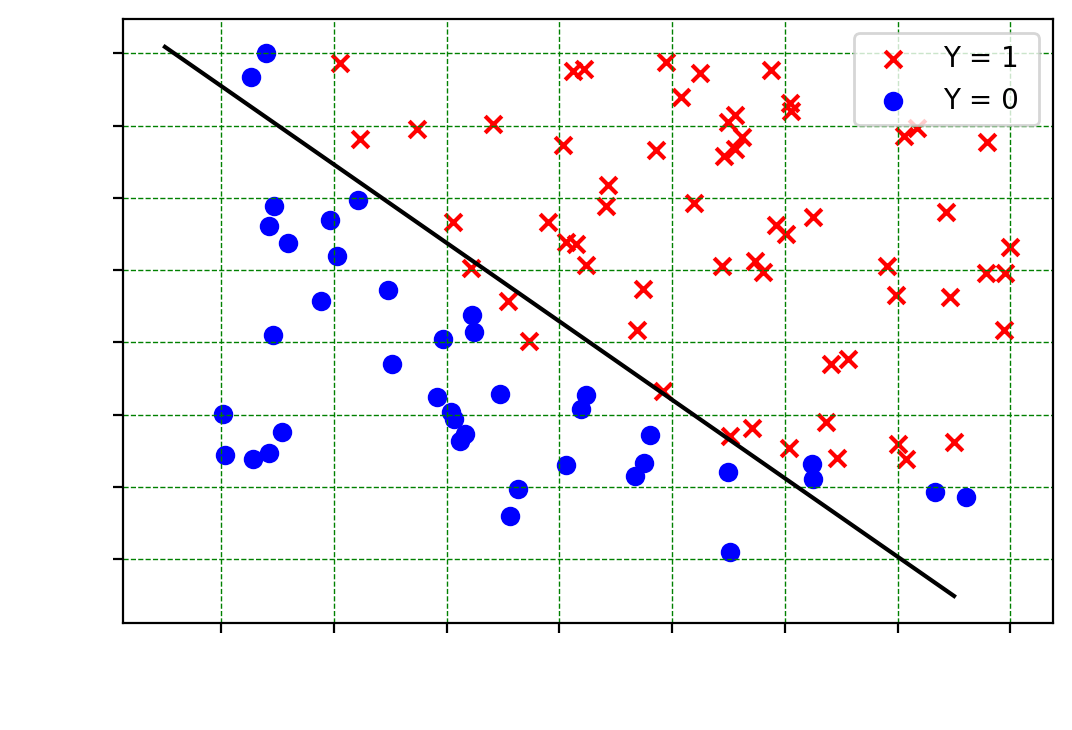

In [19]:
x1_train = x_train[:,0]
x2_train = x_train[:,1]
pos = (y_train == 1)
neg = (y_train == 0)

plt.figure(dpi = 200)
plt.scatter(x1_train[pos],x2_train[pos], label =  "Y = 1 " ,marker = "x", c ="r" )
plt.scatter(x1_train[neg],x2_train[neg], label = "Y = 0" ,marker = "o", c = "b")
plt.plot(x0,x1,c = "black")

plt.xlabel("X0", c = "w" )
plt.ylabel("X1", c = "w" )
plt.xticks(c = "w" )
plt.yticks( c = "w" )
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()